In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = sns.load_dataset('iris')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
print(df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [18]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


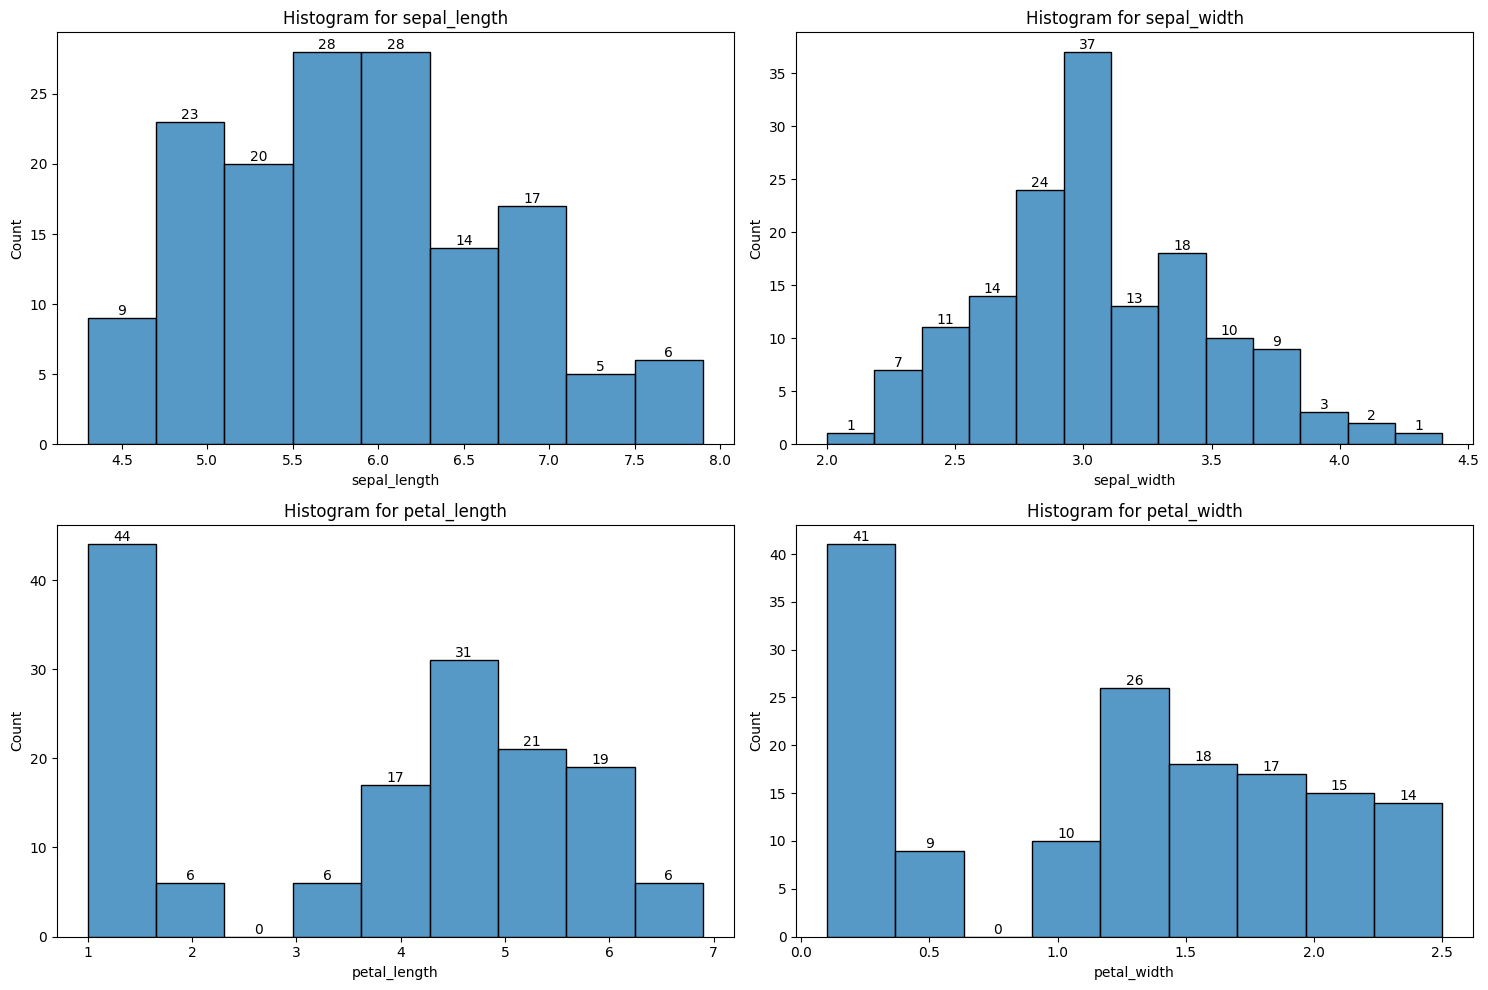

In [33]:
# Histogram for all Numeric Features
features = df.columns[:-1]

plt.figure(figsize=(15,10))
for i, feature in enumerate(features,1):
    plt.subplot(2,2,i)
    ax = sns.histplot(df[feature])
    for container in ax.containers:
        ax.bar_label(container)
    plt.title("Histogram for "+feature)
plt.tight_layout()
plt.show()

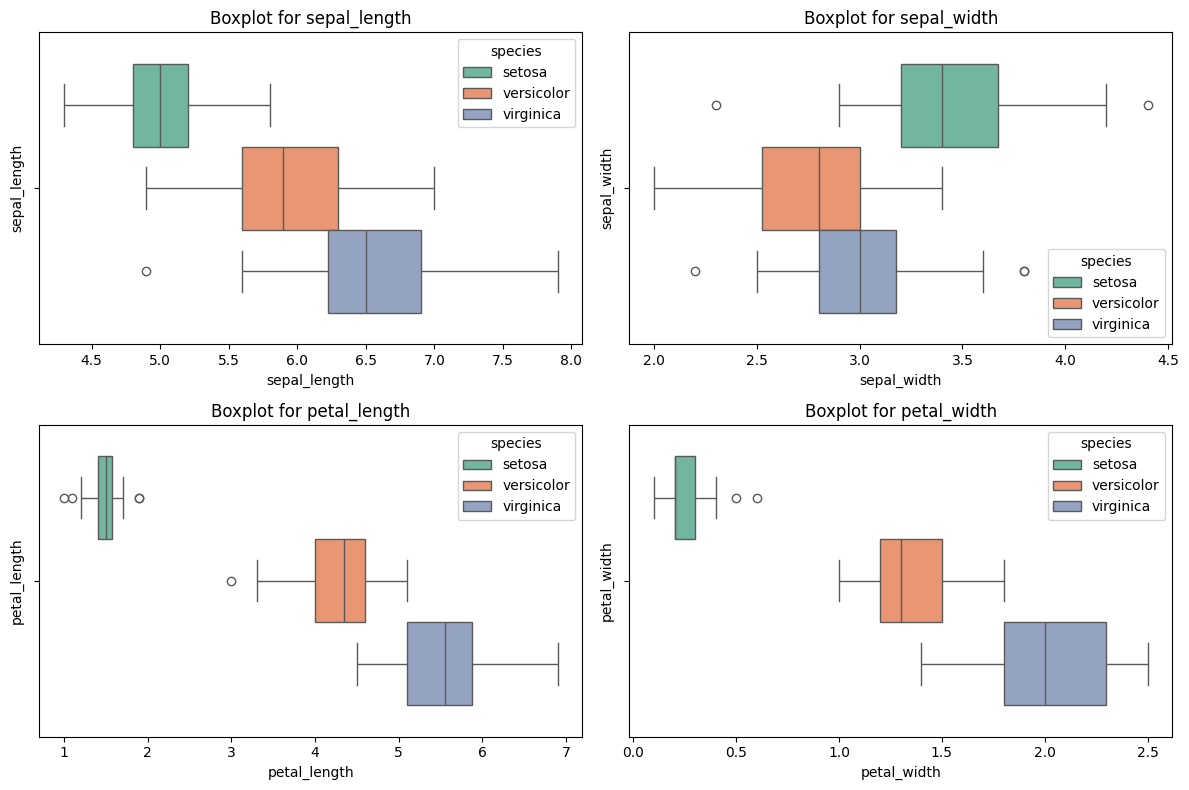

In [43]:
# Boxplot for all Numeric Features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature],palette="Set2",hue=df['species'])
    plt.ylabel(feature)
    plt.xlabel(feature)
    plt.title("Boxplot for " + feature)
plt.tight_layout()
plt.show()

In [52]:
  me = np.mean(df['sepal_length'])
  median = np.median(df['sepal_length'])
  std_dev = np.std(df['sepal_length'])

  # Identifying outliers using 1.5*IQR rule
  q1 = np.percentile(df['sepal_length'], 0.25)
  q3 = np.percentile(df['sepal_length'], 0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = [x for x in df['sepal_length'] if x < lower_bound or x > upper_bound]

  print(f"Mean: {me:.2f}")
  print(f"Median: {median:.2f}")
  print(f"Standard Deviation: {std_dev:.2f}")
  print(f"Outliers: {outliers}")

Mean: 5.84
Median: 5.80
Standard Deviation: 0.83
Outliers: [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.9, 5.4, 4.8, 4.8, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 5.1, 5.0, 4.5, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


In [58]:
for column in df.columns[:-1]:
    me = np.mean(df[column])
    median = np.median(df[column])
    std_dev = np.std(df[column])

    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)].tolist()

    print(f"\nColumn: {column}")
    print(f"Mean: {me:.2f}, Median: {median:.2f}, Standard Deviation: {std_dev:.2f}")
    print(f"Outliers: {outliers}" if outliers else "No outliers found.")


Column: sepal_length
Mean: 5.84, Median: 5.80, Standard Deviation: 0.83
No outliers found.

Column: sepal_width
Mean: 3.06, Median: 3.00, Standard Deviation: 0.43
Outliers: [4.4, 4.1, 4.2, 2.0]

Column: petal_length
Mean: 3.76, Median: 4.35, Standard Deviation: 1.76
No outliers found.

Column: petal_width
Mean: 1.20, Median: 1.30, Standard Deviation: 0.76
No outliers found.


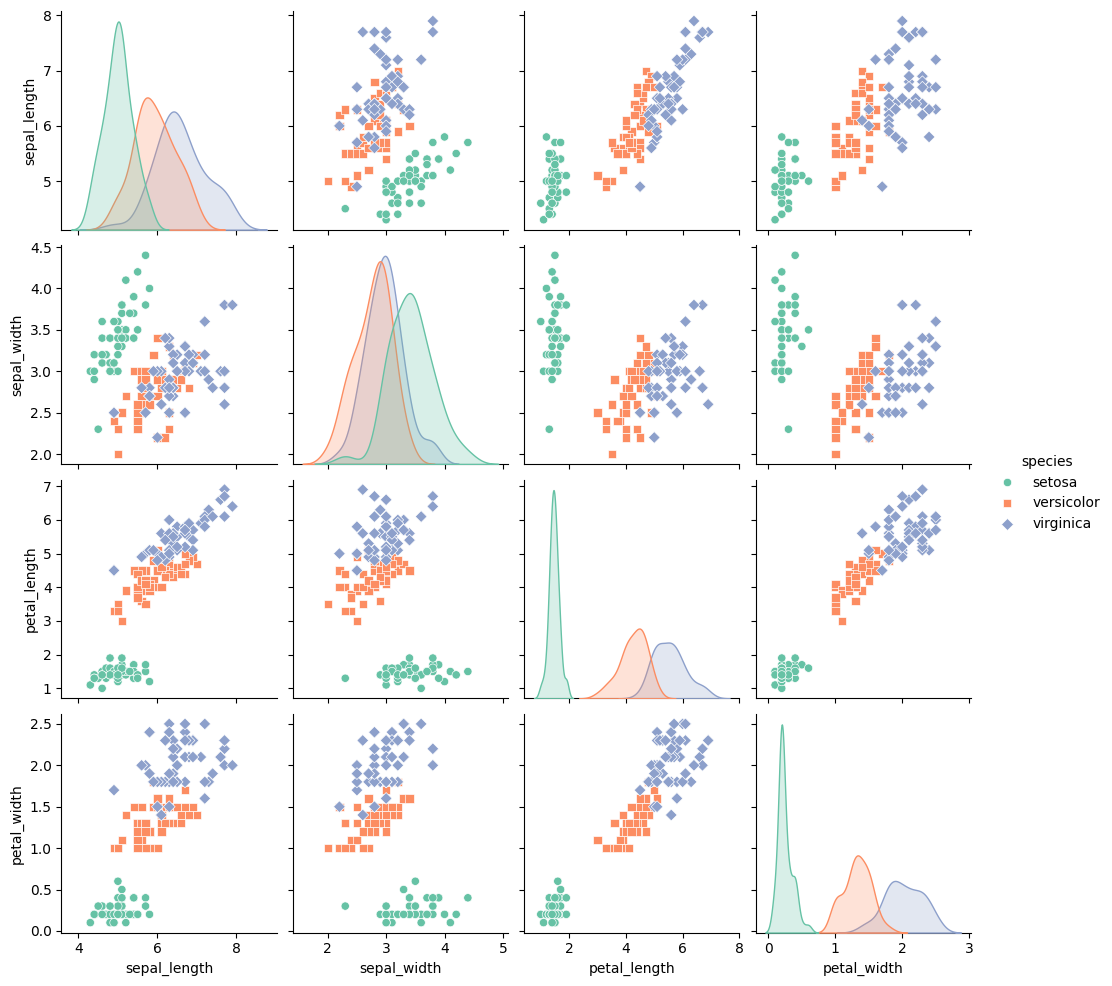

In [60]:
sns.pairplot(df, hue="species", palette="Set2", markers=["o", "s", "D"])
plt.show()